In [1224]:
import pandas as pd
import numpy as np

In [1225]:
df_ge=pd.read_csv('Data/dns_sma_ema.csv')

In [1226]:
df_ge.head()

,Timestamp,Utilization(bps),SMA4,SMA9,EMA4,EMA9,cum_sum
0,2019-01-18 08:55:00,105.0,105.000,105.0,105.000000,105.0,105.0
1,2019-01-18 09:00:00,212.5,212.500,212.5,212.500000,212.5,317.5
2,2019-01-18 09:05:00,105.0,105.000,105.0,105.000000,105.0,422.5
3,2019-01-18 09:10:00,340.0,190.625,340.0,230.781250,340.0,762.5
4,2019-01-18 09:15:00,142.5,200.000,142.5,192.491325,142.5,905.0


In [1227]:
#Defining time_steps and batch_size
TIME_STEPS=3
batch_size=55

In [1228]:

from sklearn.preprocessing import MinMaxScaler

from sklearn.cross_validation import train_test_split



train_cols = ['Utilization(bps)','SMA4','SMA9','EMA4','EMA9','cum_sum']
test_size=int(len(df_ge)*0.20)

df_train=df_ge[0:len(df_ge)-test_size]
df_test=df_ge[len(df_ge)-test_size: ]

print("Train and Test size",len(df_train), len(df_test))

Train and Test size 12906 3226


In [1229]:

x = df_train.loc[:,train_cols].values # To remove the timestamp in the dataframe

sc=MinMaxScaler(feature_range=(1,10)) # Applying MinMax Scaler

x_train = sc.fit_transform(x) # Transforming train data from 1 to 10


#x_test=sc.transform(df_test.loc[:,train_cols])

# x_train=x
# x_test=df_test.loc[:,train_cols]

In [1230]:
# sample_test=sc.inverse_transform(x_train)

# sample_test[16]

In [1232]:
#MinMax scaler is applied to the 6 columns in the dataframe and it is in the array format
x_train[0]

array([1.0373939 , 1.02620618, 1.        , 1.02106277, 1.        ,
       1.        ])

In [1233]:
x_train.shape

(12906, 6)

In [1234]:
# dim_0 = x_train.shape[0] - TIME_STEPS   #lenth of train(12903) -TIME_STEPS

# dim_1 = x_train.shape[1]  # 6 features  # coulmns in the train


# x = np.zeros((dim_0, TIME_STEPS, dim_1))

# y = np.zeros((dim_0, dim_1))


In [1240]:
# x.shape #Shape of [0]-->12906 and Shape[1] --> 6

In [1242]:

    
# for i in range(dim_0):#len of training set
#         x[i]=x_train[i:TIME_STEPS+i]
#         y[i]=x_train[TIME_STEPS+i]

X_train = []
y_train = []

for i in range(TIME_STEPS,len(x_train)): # 3, 12906
    X_train.append(x_train[i-TIME_STEPS:i])
    y_train.append(x_train[i])

    
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 6))
    
#         X_train.append(training_set_scaled[i-200:i, 0])
#     y_train.append(training_set_scaled[i, 0])

In [1239]:
x[12901]

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [1221]:
y[0]

array([1.12571474, 1.18766179, 1.23285189, 1.15014508, 1.21446538,
       1.00326365])

In [1164]:
print("length of time-series i/o",x.shape,y.shape)

length of time-series i/o (12894, 12, 6) (12894, 6)


In [1168]:
x[12893][0][0]

912.0

no_of_rows_drop = y.shape[0]%batch_size
print(no_of_rows_drop)
if(no_of_rows_drop > 0):

    y=y[:-no_of_rows_drop]

no_of_rows_drop = x.shape[0]%batch_size
print(no_of_rows_drop)
if(no_of_rows_drop > 0):

    x=x[:-no_of_rows_drop]


In [1169]:
x = np.reshape(x, (x.shape[0], x.shape[1], 6))

In [1170]:
x.shape

(12894, 12, 6)

In [1171]:
x[0][0][0]

105.0

In [1172]:
y.shape

(12894, 6)

In [1173]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

In [1174]:

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x.shape[1], 6)))
regressor.add(Dropout(0.2))


# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 6))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [1175]:
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_46 (LSTM)               (None, 12, 50)            11400     
_________________________________________________________________
dropout_51 (Dropout)         (None, 12, 50)            0         
_________________________________________________________________
lstm_47 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_52 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 6)                 306       
Total params: 31,906
Trainable params: 31,906
Non-trainable params: 0
_________________________________________________________________


In [1176]:
# Fitting the RNN to the Training set
regressor.fit(x, y, epochs = 30, batch_size = 64,verbose=1)

Epoch 1/30
12894/12894 [==============================] - 12s 913us/step - loss: 2639330918743.0806
Epoch 2/30
12894/12894 [==============================] - 6s 472us/step - loss: 2639317877861.8125
Epoch 3/30
12894/12894 [==============================] - 6s 489us/step - loss: 2639306732655.3423
Epoch 4/30
12894/12894 [==============================] - 6s 479us/step - loss: 2639295850040.1475
Epoch 5/30
12894/12894 [==============================] - 6s 469us/step - loss: 2639284899439.1040
Epoch 6/30
12894/12894 [==============================] - 6s 475us/step - loss: 2639274153852.8032
Epoch 7/30
12894/12894 [==============================] - 6s 485us/step - loss: 2639263589819.6221
Epoch 8/30
12894/12894 [==============================] - 7s 571us/step - loss: 2639252733878.3013
Epoch 9/30
12894/12894 [==============================] - 7s 544us/step - loss: 2639241825280.4766
Epoch 10/30
12894/12894 [==============================] - 7s 534us/step - loss: 2639231102362.9023
Epoch 11

In [1063]:

# regressor.save('model/dns-sma-ema.h5') 
# print('model built successfully')

In [1177]:
dataset_total = pd.concat((df_train[train_cols], df_test[train_cols]), axis = 0)
#inputs=df_test[12894:].values
inputs = dataset_total[len(dataset_total) - len(df_test) - TIME_STEPS:].values
inputs = inputs.reshape(-1,6)
#inputs = sc.transform(inputs)
# inputs=df_ge.loc[:,train_cols]

# inputs_validation=inputs[12894:].values

In [1179]:
inputs[0][0]

595.625

In [1180]:
dim_0 = inputs.shape[0] - TIME_STEPS   #12903

dim_1 = inputs.shape[1]  # 6 features


x_test = np.zeros((dim_0, TIME_STEPS, dim_1))

In [1181]:
x_test.shape

(3226, 12, 6)

In [1182]:
x_test[0]

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [1183]:

# Getting the Random predictiond data


counter=0
for i in range(TIME_STEPS, len(df_test)+TIME_STEPS):
    
    x_test[counter]= inputs[i-TIME_STEPS:i]
    counter+=1
# X_test = np.array(X_test)
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [1184]:
X_test = np.array(x_test)

In [1185]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 6))

In [1186]:
X_test.shape

(3226, 12, 6)

In [1188]:
X_test[0][0][0]

595.625

In [1189]:
predicted_pattern = regressor.predict(X_test)

In [1190]:
predicted_pattern.shape

(3226, 6)

In [1108]:
#predicted_pattern = sc.inverse_transform(predicted_pattern)

In [1191]:
predicted_result=predicted_pattern[:,0]


In [1196]:
predicted_result[500]

283.03357

In [1197]:
real_pattern_prediction=df_test.iloc[:, 1:2].values

In [1198]:
predicted_result.shape

(3226,)

In [1199]:
real_pattern_prediction#=sc.transform(real_pattern_prediction)

array([[472.125],
       [556.875],
       [721.25 ],
       ...,
       [920.5  ],
       [586.   ],
       [938.875]])

In [1200]:
predicted_result[0]

283.03357

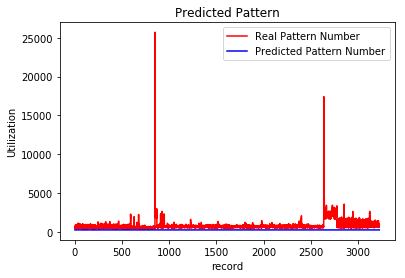

In [1201]:


import matplotlib.pyplot as plt
%matplotlib inline
#
# Visualising the results
plt.plot(real_pattern_prediction, color = 'red', label = 'Real Pattern Number')
plt.plot(predicted_result, color = 'blue', label = 'Predicted Pattern Number')
plt.title('Predicted Pattern')
plt.xlabel('record')
plt.ylabel('Utilization')
plt.legend()
plt.show()

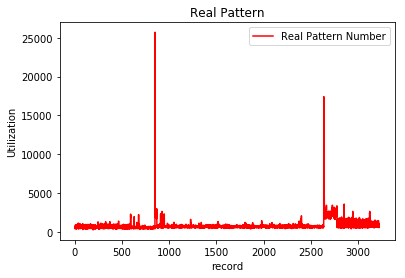

In [982]:


import matplotlib.pyplot as plt
%matplotlib inline
#
# Visualising the results
plt.plot(real_pattern_prediction, color = 'red', label = 'Real Pattern Number')
#plt.plot(predicted_pattern, color = 'blue', label = 'Predicted Pattern Number')
plt.title('Real Pattern')
plt.xlabel('record')
plt.ylabel('Utilization')
plt.legend()
plt.show()

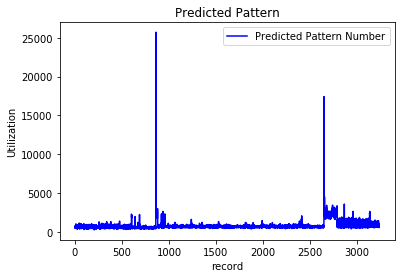

In [983]:


import matplotlib.pyplot as plt
%matplotlib inline
#
# Visualising the results
#plt.plot(real_pattern_prediction, color = 'red', label = 'Real Pattern Number')
plt.plot(predicted_result, color = 'blue', label = 'Predicted Pattern Number')
plt.title('Predicted Pattern')
plt.xlabel('record')
plt.ylabel('Utilization')
plt.legend()
plt.show()

In [984]:
predicted_result=predicted_result.reshape(-1,1)
predicted_result.shape

(3238, 1)

In [925]:
real_pattern_prediction.shape

(3226, 1)

In [933]:
real_utilization = pd.DataFrame({'Real Utilization':real_pattern_prediction[:,0]})
real_utilization.to_csv('Data/Real Utilization.csv',index=False)

In [932]:
predicted_utilization = pd.DataFrame({'Predicted Utilization':predicted_result[:,0]})
predicted_utilization.to_csv('Data/Predicted Utilization.csv',index=False)

In [445]:
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 12, 50)            11400     
_________________________________________________________________
dropout_27 (Dropout)         (None, 12, 50)            0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_28 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 51        
Total params: 31,651
Trainable params: 31,651
Non-trainable params: 0
_________________________________________________________________
